# K Means Clustering


K-Means Clustering is a simple yet powerful algorithm in data science
There are a plethora of real-world applications of K-Means Clustering (a few of which we will cover here)
K-Means Clustering along with an implementation in Python on a real-world dataset

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. 

**The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:**

* `Reassign data points to the cluster whose centroid is closest. `
* `Calculate new centroid of each cluster.` 

These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

# Import Libraries

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Get the Data



In [129]:
df = pd.read_csv('https://raw.githubusercontent.com/Dixit01/100daysofML/main/K-Means_clustering/clg_data.csv', index_col=0)
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


# EDA and Data Visualisations

In [130]:
df.info

<bound method DataFrame.info of                                Private   Apps  Accept  Enroll  Top10perc  \
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

                                Top25perc  F.Undergrad 

In [131]:
df.T.describe()

,Abilene Christian University,Adelphi University,Adrian College,Agnes Scott College,Alaska Pacific University,Albertson College,Albertus Magnus College,Albion College,Albright College,Alderson-Broaddus College,...,Winthrop University,Wisconsin Lutheran College,Wittenberg University,Wofford College,Worcester Polytechnic Institute,Worcester State College,Xavier University,Xavier University of Louisiana,Yale University,York College of Pennsylvania
count,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
unique,18,16,18,18,18,18,18,17,18,18,...,18,17,18,18,17,17,18,18,16,16
top,Yes,16,Yes,Yes,Yes,Yes,Yes,37,Yes,Yes,...,No,48,Yes,Yes,86,60,Yes,Yes,99,28
freq,1,2,1,1,1,1,1,2,1,1,...,1,2,1,1,2,2,1,1,2,2


In [132]:
df.columns


Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

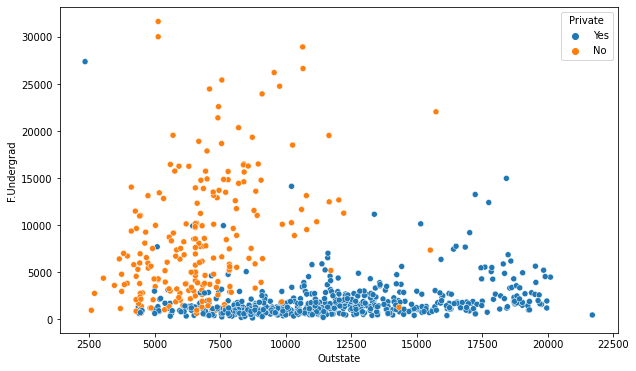

In [133]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, y='F.Undergrad', x='Outstate', hue='Private');

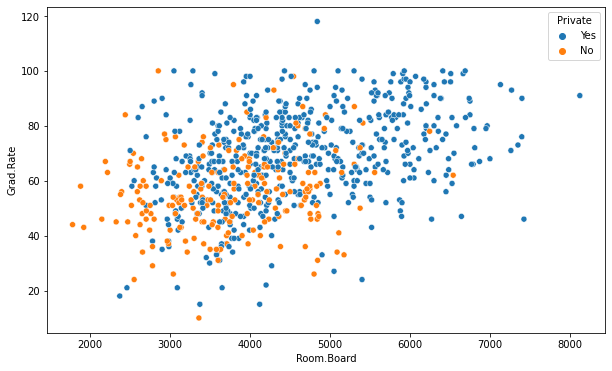

In [134]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, y='Grad.Rate', x='Room.Board', hue='Private');

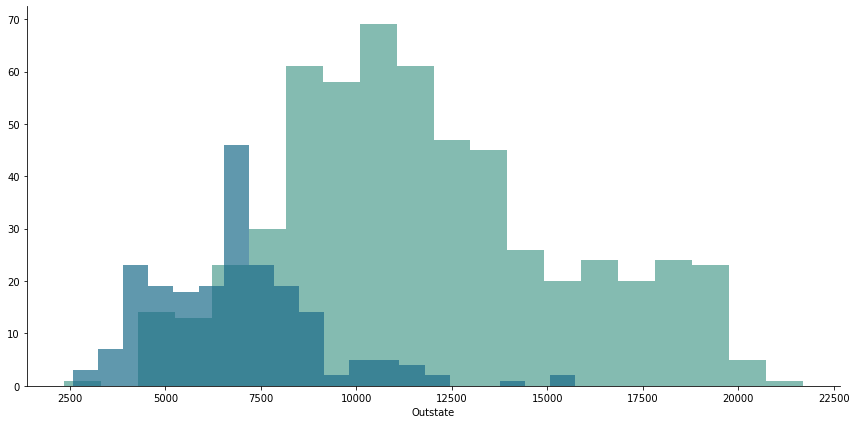

In [135]:
g = sns.FacetGrid(data=df, hue='Private', height=6, aspect=2,palette='crest');
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.7);

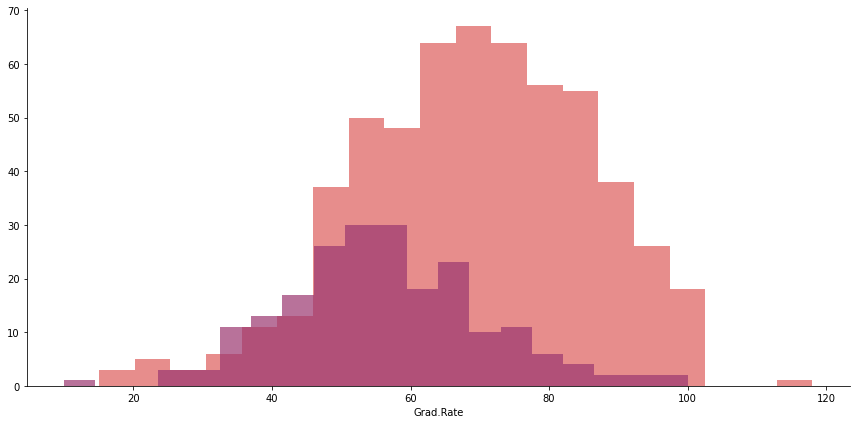

In [136]:
g = sns.FacetGrid(data=df, hue='Private', palette='flare', height=6, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

In [137]:
df['Private'].value_counts()
X = df.drop('Private', axis=1) # exclude "Private" label column
X.head(2) 

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


# K-Means Modelling

In [138]:
from sklearn.cluster import KMeans

In [139]:
wcss = []
kmmodels_labels = {}
cluster_centers = {}
predicted_labels = {}
for i in range(1,21):   
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=30)  #model building- for all 20 values it is going to create a cluster-- for each cluster kmeans++ implementation which is default is done
    kmeans.fit(X)                                                   #model fitting - grouping to be done based on X
    wcss.append(kmeans.inertia_) 
    kmmodels_labels[i]= kmeans.labels_
    cluster_centers[i] = kmeans.cluster_centers_

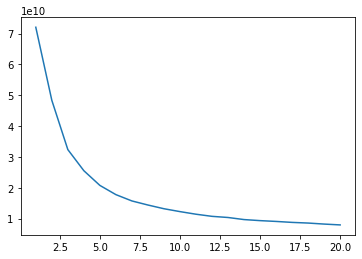

In [140]:
#lotting ebow graph using the WCSS

plt.plot(range(1,21),wcss) 

In [141]:
print("Cluster centers(number of cluster = 5): = \n", cluster_centers[5])

Cluster centers(number of cluster = 5): = 
 [[2.49063793e+03 1.67400575e+03 5.13821839e+02 3.93850575e+01
  6.88965517e+01 2.04941954e+03 2.83385057e+02 1.55319770e+04
  5.23841379e+03 5.75293103e+02 1.06467241e+03 8.31206897e+01
  8.97816092e+01 1.15011494e+01 3.21321839e+01 1.34827069e+04
  7.67758621e+01]
 [1.51104412e+04 1.01255000e+04 3.88338235e+03 4.07058824e+01
  7.36764706e+01 1.98478235e+04 3.60058824e+03 9.22535294e+03
  4.49376471e+03 6.07500000e+02 1.77235294e+03 8.67058824e+01
  9.17647059e+01 1.59823529e+01 1.76470588e+01 1.08922353e+04
  6.55882353e+01]
 [1.19294444e+03 9.01606481e+02 3.57932870e+02 2.09212963e+01
  4.80509259e+01 1.51548611e+03 5.04923611e+02 9.05198380e+03
  4.07788889e+03 5.29446759e+02 1.31178935e+03 6.47546296e+01
  7.25092593e+01 1.44868056e+01 2.10555556e+01 7.55560648e+03
  6.22916667e+01]
 [9.34175000e+03 3.60625000e+03 1.32195000e+03 7.60500000e+01
  9.17000000e+01 5.28320000e+03 4.27200000e+02 1.81197500e+04
  6.04275000e+03 5.76600000e+02 1.

In [142]:
print("kmmodels_labels(number of cluster = 5): = \n", kmmodels_labels[5])

kmmodels_labels(number of cluster = 5): = 
 [2 0 2 0 2 2 2 0 0 2 0 0 2 2 2 2 0 2 2 2 3 4 2 1 2 2 2 4 2 2 2 2 2 2 2 2 0
 0 2 4 2 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 4 2 2 1 0 4 0 2 0 2 2 2 2 1 3 0 0 2
 0 2 2 2 4 4 2 2 2 2 2 2 0 3 2 2 2 0 2 2 0 2 0 2 2 2 0 2 4 4 4 2 0 0 0 2 2
 2 2 2 0 0 2 0 4 2 0 2 0 0 2 4 2 2 2 2 2 2 2 2 2 2 2 0 4 0 0 4 2 2 3 2 2 2
 2 0 2 0 0 2 2 2 2 2 3 0 2 2 0 0 0 2 2 2 2 2 2 0 0 2 3 0 4 4 2 2 2 4 2 2 0
 0 2 2 2 2 2 3 2 2 2 2 0 2 2 2 0 4 2 1 2 0 2 2 2 2 2 2 2 0 2 2 2 2 4 0 2 0
 4 4 2 0 2 2 2 2 0 2 2 4 2 2 2 0 2 2 0 2 0 0 0 4 2 2 2 0 3 0 2 2 0 0 0 4 0
 0 2 2 2 2 2 2 2 2 0 4 0 2 2 4 1 2 2 1 0 4 4 2 2 2 3 2 2 0 4 2 2 2 0 2 2 2
 0 2 2 0 2 0 2 4 2 2 0 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 4 4 0 0 2 0 2 2 2
 2 0 2 2 2 0 0 4 2 0 2 4 4 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 4 1 2 2 4
 2 2 2 2 2 4 2 2 2 0 2 2 4 4 2 4 0 2 2 2 0 2 2 2 2 2 2 0 2 2 0 4 2 2 2 2 2
 3 2 2 2 4 1 2 2 4 0 4 1 4 4 2 2 2 3 0 2 4 0 0 2 0 1 0 2 2 4 2 2 2 4 0 2 0
 2 1 0 2 2 2 2 2 2 0 2 2 0 2 2 3 0 1 2 2 2 4 2 0 0 0 0 0

## Model Evaluation


In [147]:
# Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.

df['Cluster'] = df['Private'].map({'Yes': 1, 'No': 0})
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [148]:
km_model  = KMeans(n_clusters=2,init='k-means++',random_state=30) #MODEL BUILDING with 5 clusters
km_model.fit(X)
km_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [149]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(df['Cluster'], km_model.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [150]:
confusion_matrix(df['Cluster'], km_model.labels_)

array([[ 74, 138],
       [ 34, 531]])